# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Vitor Carreta de Aguiar </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import scipy.stats as stats

In [28]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [29]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [30]:
df.loc[(df.Latitude > 0),'Hemisfério'] = 'Norte'
df.loc[(df.Latitude < 0),'Hemisfério'] = 'Sul'
df.head(10)


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,Sul
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

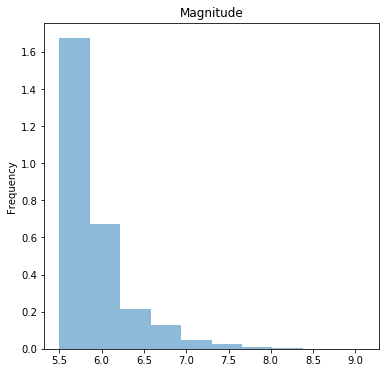

In [31]:
plot = df.Magnitude.plot.hist(title='Magnitude', normed=1, figsize=(6, 6), alpha=0.5)

O histograma mostra que a frequência de terremotos de baixa magnitude (5,5) é maior que a frequência de terremotos de maior escala, de forma que, quanto maior a magnitude, menor sua frequência.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [32]:
fit = expon.fit(df.Magnitude)

mu = fit[0]
sigma = fit[1]
print(mu)
print(sigma)

5.49999999967
0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

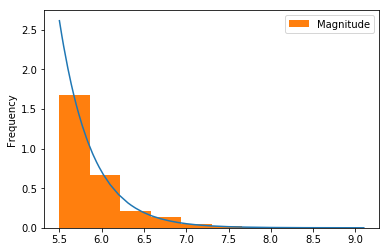

In [33]:
plt.plot(sorted(df.Magnitude), stats.expon.pdf(sorted(df.Magnitude), loc=mu, scale = sigma))
df.Magnitude.plot(kind = 'hist', legend = True, normed = True)
plt.show()

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [34]:
tab_cruz = pd.crosstab(df.Type, df.Hemisfério, normalize = True)*100
tab_cruz

Hemisfério,Norte,Sul
Type,,
Earthquake,44.714023,54.517107
Explosion,0.008543,0.008543
Nuclear Explosion,0.627910,0.119602
Rock Burst,0.000000,0.004271


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [35]:
earqua_nor = len(df.loc[(df.Hemisfério == 'Norte') & (df.Type == 'Earthquake')])
earqua_all = len(df.Hemisfério)
prob = (earqua_nor/earqua_all)*100


print("A propabilidade de ocorrer um terremoto no hemisfério norte é de {0}%".format(prob))

A propabilidade de ocorrer um terremoto no hemisfério norte é de 44.71211344609602%


Explique o seu raciocínio

Para encontrarmos a probabilidade de ocorrer um terremoto no hemisfério norte, nós dividimos o número de terremotos ocorridos no norte pelo total de terremotos ocorridos.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [36]:
rating_probs = df.groupby('Hemisfério').size().div(len(df))
df.groupby(['Type','Hemisfério']).size().div(len(df)).div(rating_probs, axis=0, level = 'Hemisfério')

Type               Hemisfério
Earthquake         Norte         0.985966
                   Sul           0.997577
Explosion          Norte         0.000188
                   Sul           0.000156
Nuclear Explosion  Norte         0.013846
                   Sul           0.002189
Rock Burst         Sul           0.000078
dtype: float64

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [37]:
print("A probabilidade é de {0}%".format(0.013846*100))

A probabilidade é de 1.3846%


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

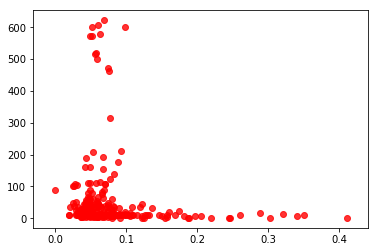

In [38]:
plt.scatter(df["Magnitude Error"], df["Depth"], c='red', alpha=0.8)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [42]:
cor = df.Depth.corr(df["Magnitude Error"])

print("A correlação entre as variáveis é de {0}".format(cor))

A correlação entre as variáveis é de -0.07691843892338719


Explique o que significa o valor da correlação calculada acima? 

O valor da correlação é muito próximo de 0, o que significa que há pouca correlação entre as duas variáveis utilizadas.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [39]:
data = df.loc[:,["Longitude","Latitude"]]
data.describe()

,Longitude,Latitude
count,23412.000000,23412.000000
mean,39.639961,1.679033
std,125.511959,30.113183
min,-179.997000,-77.080000
25%,-76.349750,-18.653000
50%,103.982000,-3.568500
75%,145.026250,26.190750
max,179.998000,86.005000


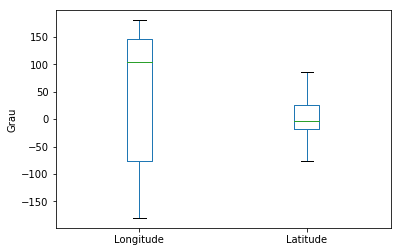

In [40]:
plot = data.plot(kind='box')
plt.ylabel("Grau")

De acordo com os dados mostrados no boxplot, é possível dizer que a porcentagem de abalos registrados na região norte é maior que a dos registrados na região sul. Além disso, estes ocorreram com maior frequência em longitudes abaixo dos 100°.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [41]:
tipo = df[(df['Magnitude Type'] == "MB") & (df.Type == "Nuclear Explosion")]
porcentagem = (tipo.Hemisfério.value_counts(normalize=True, sort=False))
porcentagem

Norte    0.828221
Sul      0.171779
Name: Hemisfério, dtype: float64

É mais provável que os abalos tenham ocorrido no norte.